In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import scipy.stats as stats

In [35]:
# READING THE DATA
data = pd.read_csv('Train_Data.csv.xls')
X_test = pd.read_csv('Test_Data.csv.xls')

In [36]:
#SUMMARIZING THE DATA
print(data.shape)
data.describe()

(4571, 9)


,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [37]:
print(data.dtypes)

date            object
campaign        object
adgroup         object
ad              object
impressions      int64
clicks           int64
cost           float64
conversions      int64
revenue        float64
dtype: object


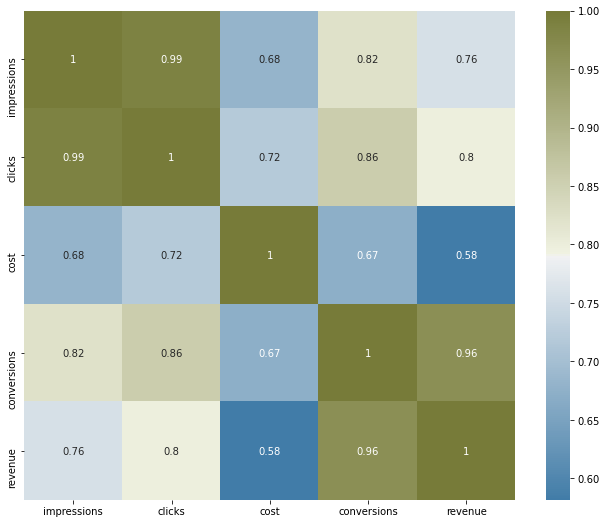

In [38]:
import seaborn as sns
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 90, as_cmap=True)

sns.heatmap(data.corr(),annot=True,cmap=cmap)
plt.show()

In [39]:
#Date- extracting day of week and year
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.dayofweek
data['year']= data['date'].dt.year
data = data.drop(['date','campaign'],axis=1)

In [40]:
X_test['date'] = pd.to_datetime(X_test['date'])
X_test['day_of_week'] = X_test['date'].dt.dayofweek
X_test['year']= X_test['date'].dt.year
X_test = X_test.drop(['date','campaign'],axis=1)


In [41]:

# Encoding adgroup
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['adgroup'] = le.fit_transform(data['adgroup'])
data['ad']=le.fit_transform(data['ad'])
X_test['adgroup'] = le.fit_transform(X_test['adgroup'])
X_test['ad']=le.fit_transform(X_test['ad'])

In [42]:
version = []
for i in range(len(data)):
    cache = str(f"{data.adgroup[i]:02}")
    cache = float(str(cache) + '.' + str(f"{data.ad[i]:02}"))
    version.append(cache)
data['version'] = version

version = []
for i in range(len(X_test)):
    cache = str(f"{X_test.adgroup[i]:02}")
    cache = float(str(cache) + '.' + str(f"{X_test.ad[i]:02}"))
    version.append(cache)
X_test['version'] = version

In [43]:
data = data.drop(['adgroup','ad'],axis=1)
X_test = X_test.drop(['adgroup','ad'],axis=1)

In [44]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

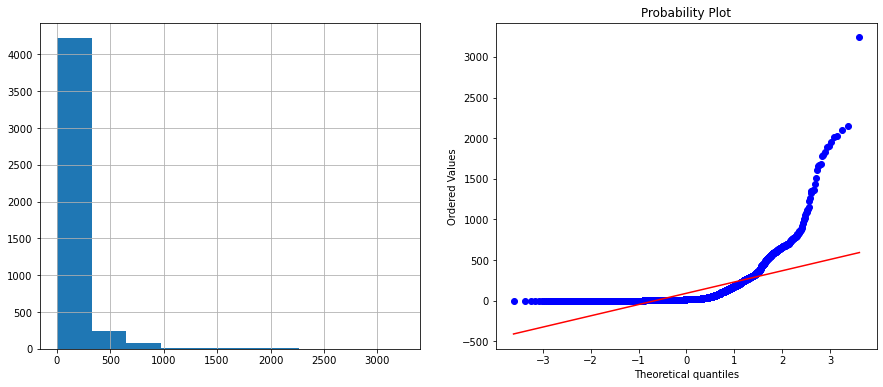

In [45]:
diagnostic_plots(data, 'impressions')

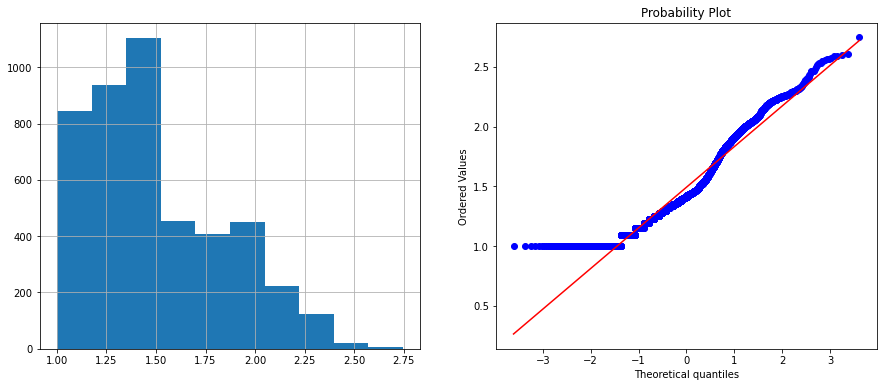

In [46]:
data['Exp_impres']=data['impressions']**(1/8)
diagnostic_plots(data,'Exp_impres')

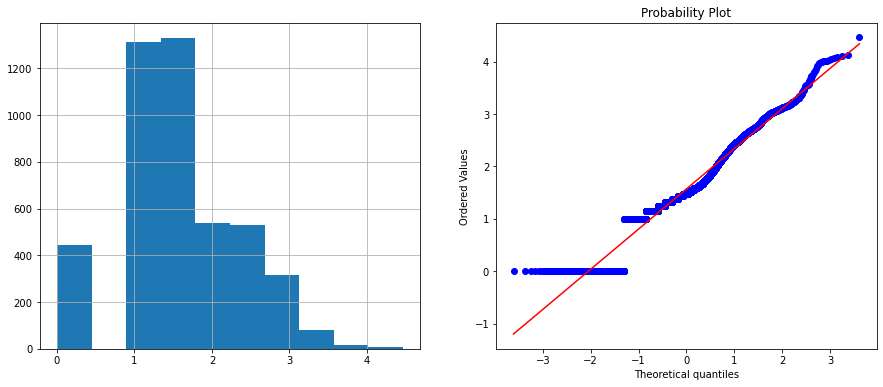

In [47]:
data['Exp_clicks']=data['clicks']**(1/5)
diagnostic_plots(data,'Exp_clicks')

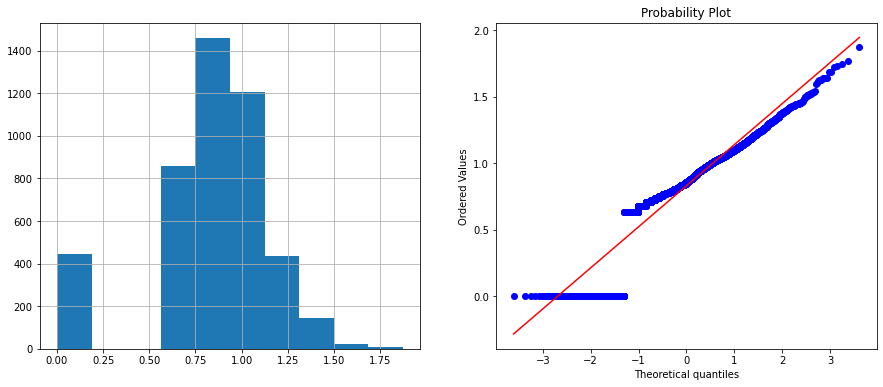

In [48]:
data['Exp_cost']=data['cost']**(1/10)
diagnostic_plots(data,'Exp_cost')

In [49]:
data.head()

,impressions,clicks,cost,conversions,revenue,day_of_week,year,version,Exp_impres,Exp_clicks,Exp_cost
0,24,6,0.08,0,0.00,2,2020,0.00,1.487738,1.430969,0.776800
1,1,0,0.00,0,0.00,2,2020,1.00,1.000000,0.000000,0.000000
2,13,4,0.04,0,0.00,2,2020,2.00,1.377980,1.319508,0.724780
3,5,4,0.08,0,0.00,2,2020,3.00,1.222845,1.319508,0.776800
4,247,126,1.29,4,925.71,2,2020,0.11,1.991073,2.630717,1.025791


In [51]:
X_test['Exp_impres']=X_test['impressions']**(1/8)
X_test['Exp_clicks']=X_test['clicks']**(1/5)
X_test['Exp_cost']=X_test['cost']**(1/10)

In [52]:

data=data.drop(columns = ['cost','clicks','impressions'], axis=1)
X_test=X_test.drop(columns = ['cost','clicks','impressions'], axis=1)

In [53]:

X = data.drop(['revenue'],axis = 1)
y = data.revenue

In [54]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [55]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [56]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [57]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
model = XGBRegressor()

In [58]:
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [59]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 5.23 seconds.


In [60]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [62]:
xgmodel = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=5,
             min_child_weight=7, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

xgmodel.fit(X,y)
predictions = xgmodel.predict(X_test)

In [63]:
res = pd.DataFrame(predictions) 
res.index = X_test.index 
res.columns = ["revenue"]
res.to_csv("test.csv", index = False)